In [53]:
import os
import torch
from torch.utils.data import random_split
import torchio as tio
from pathlib import Path
import importlib
from utils import validate_segmentation, plot_prediction, dice_score
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import cv2
import numpy as np

import torchio_utils
importlib.reload(torchio_utils)
from torchio_utils import torchio_validation_composition, process_and_crop_labels
from utils import validate_segmentation, plot_prediction, dice_score

base_path = '/home/asp/Downloads/DMIAI/DMIAI_2023/tumor-segmentation'

dataset_dir_name = 'data_validation'
dataset_dir = Path(dataset_dir_name)
images_dir = dataset_dir / 'patients/imgs'
image_paths = sorted(images_dir.glob('*.png'))

In [54]:
ORIGINAL_SIZE = torchio_validation_composition(image_paths,
                          invert_colors=True,
                          cropsize = (400,991),
                          dataset_ID = 9)

Found 10 subjects
Saving 10 subjects to nnUNet_raw/Dataset009...


100%|██████████| 10/10 [00:01<00:00,  7.79it/s]


In [55]:
# Define the base path for your nnUNet directories

# Set the environment variables
os.environ['nnUNet_raw'] = os.path.join(base_path, 'nnUNet_raw')
os.environ['nnUNet_preprocessed'] = os.path.join(base_path, 'nnUNet_preprocessed')
os.environ['nnUNet_results'] = os.path.join(base_path, 'nnUNet_results')

In [56]:
!nnUNetv2_predict -i nnUNet_raw/Dataset009/imagesTs -o nnUNet_raw/Dataset009/labelsTs -d 9 -c 2d -f 5 -device cpu


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

perform_everything_on_gpu=True is only supported for cuda devices! Setting this to False
There are 10 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 10 cases that I would like to predict

Predicting patient_0000:
perform_everything_on_gpu: False
100%|█████████████████████████████████████████████| 1/1 [00:05<00:00,  5.68s/it]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with patient_0000

Predicting patient_0001:
perform_everything_on_gpu: False
100%|███

In [57]:

import torchio_utils
importlib.reload(torchio_utils)
from torchio_utils import torchio_validation_composition, process_and_crop_labels

validation_dir_name = 'nnUNet_raw/Dataset009/labelsTs'
validation_dir = Path(validation_dir_name)
validation_paths = sorted(validation_dir.glob('*.png'))

print('Number of validation images: ', len(validation_paths))

process_and_crop_labels(validation_paths,
                        ORIGINAL_SIZE,
                        save_dir='data_validation/patients/labels')

Number of validation images:  10
Processed labels saved to data_validation/patients/labels


## open images and evaluate DICE score

Average Dice Score:  0.8702112357290248
Dice Score: 0.9478527607361963


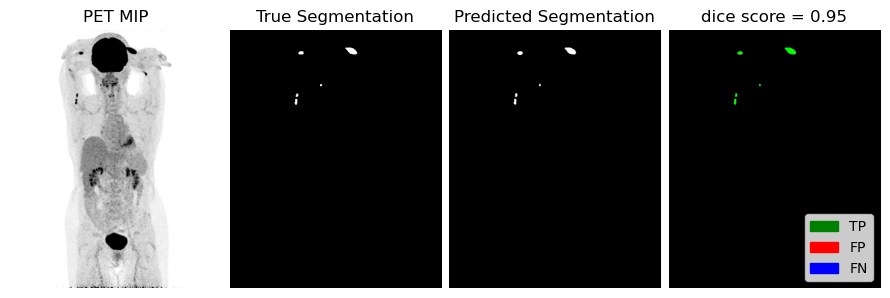

Dice Score: 0.6755241851774964


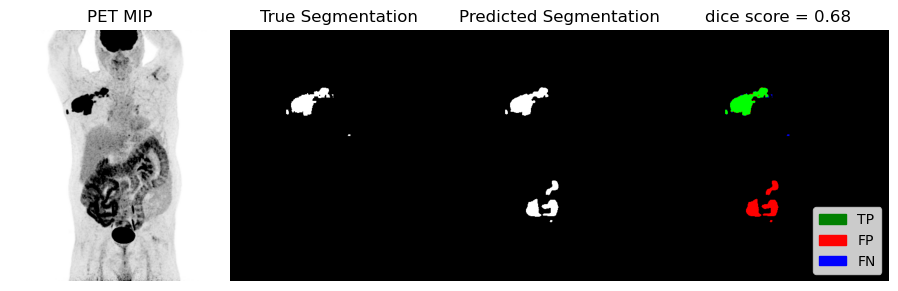

Dice Score: 0.8995215311004785


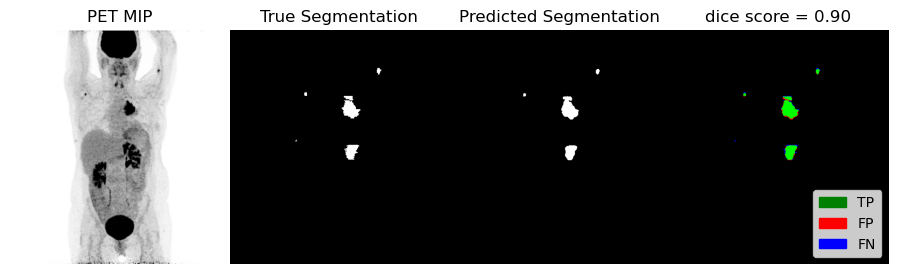

Dice Score: 0.9412166780587833


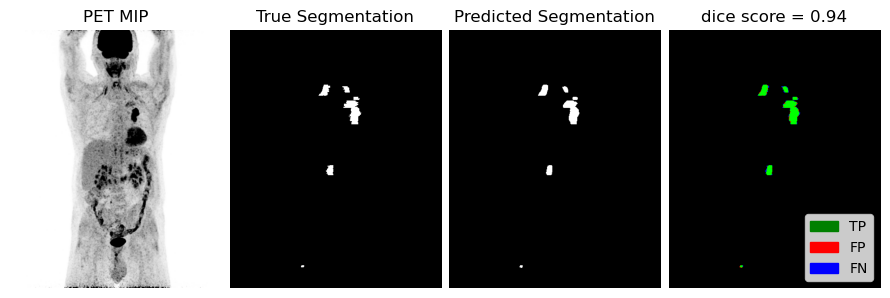

Dice Score: 0.7596048298572997


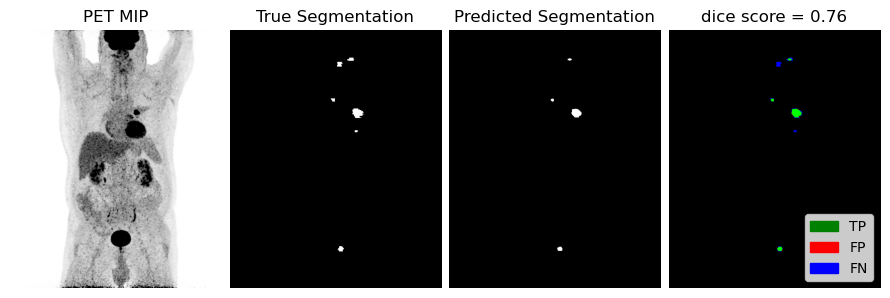

Dice Score: 0.8802228412256268


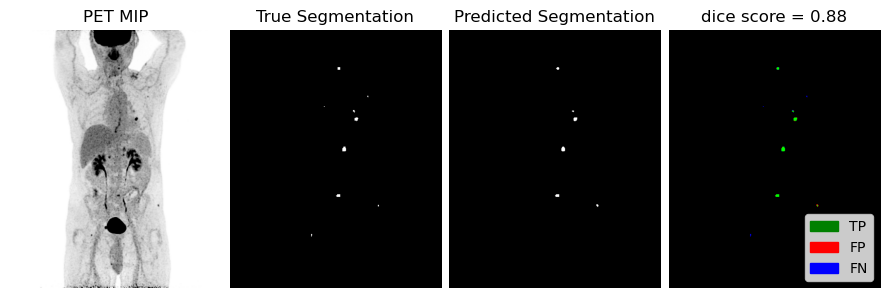

Dice Score: 0.9169262720664589


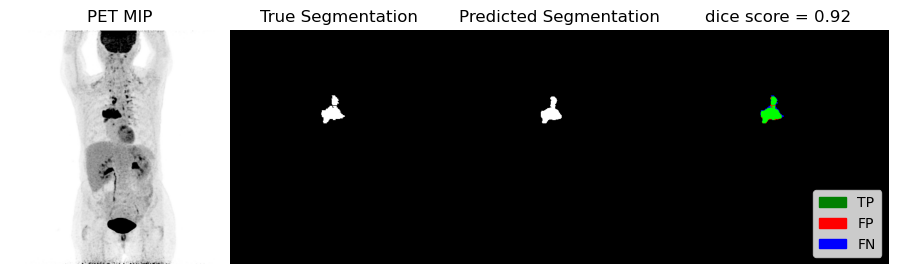

Dice Score: 0.9432258064516129


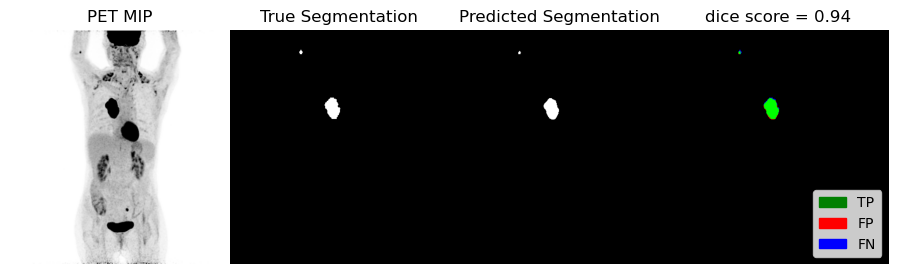

Dice Score: 0.9003344481605351


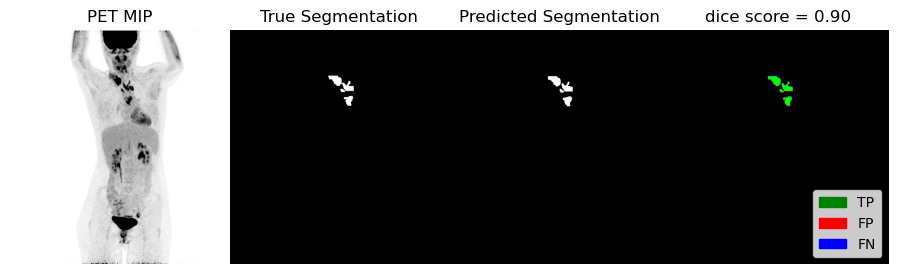

Dice Score: 0.8376830044557607


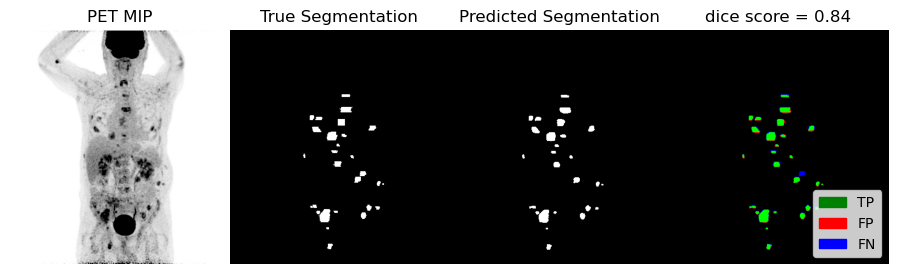

In [58]:
#average dice score

dice_scores = []
for i in range(0, 10):
    index_patient = '00' + str(i)
    seg_pred_path = f'data_validation/patients/labels/segmentation_{index_patient}.png'
    seg_true_path = f'data/patients/labels/segmentation_{index_patient}.png'

    seg_pred = cv2.imread(seg_pred_path)
    seg_true = cv2.imread(seg_true_path)

    dice_scores.append(dice_score(seg_true, seg_pred))

print('Average Dice Score: ', np.mean(dice_scores))

length = len(validation_paths)

for i in range(0,length):
    index_patient = '00' + str(i)
    img_f_path = f'data_validation/patients/imgs/patient_{index_patient}.png'
    seg_pred_path = f'data_validation/patients/labels/segmentation_{index_patient}.png'
    seg_true_path = f'data/patients/labels/segmentation_{index_patient}.png'

    # Read the images
    img_f = cv2.imread(img_f_path)
    seg_pred = cv2.imread(seg_pred_path)

    # Validate the segmentation
    validate_segmentation(img_f, seg_pred)

    seg_true = cv2.imread(seg_true_path)

    # Plot the prediction (assuming plot_prediction function exists and works correctly)
    plot_prediction(img_f, seg_true, seg_pred)



In [62]:
base_path = '/home/asp/Downloads/DMIAI/DMIAI_2023/tumor-segmentation'

dataset_dir_name = 'data_validation'
dataset_dir = Path(dataset_dir_name)
images_dir = dataset_dir / 'controls/imgs'
image_paths = sorted(images_dir.glob('*.png'))

ORIGINAL_SIZE = torchio_validation_composition(image_paths,
                          invert_colors=True,
                          cropsize = (400,991),
                          dataset_ID = 9)

# Set the environment variables
os.environ['nnUNet_raw'] = os.path.join(base_path, 'nnUNet_raw')
os.environ['nnUNet_preprocessed'] = os.path.join(base_path, 'nnUNet_preprocessed')
os.environ['nnUNet_results'] = os.path.join(base_path, 'nnUNet_results')

Found 426 subjects
Saving 426 subjects to nnUNet_raw/Dataset009...


100%|██████████| 426/426 [00:55<00:00,  7.63it/s]


In [63]:
!nnUNetv2_predict -i nnUNet_raw/Dataset009/imagesTs -o nnUNet_raw/Dataset009/labelsTs -d 9 -c 2d -f 5 -device cpu


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

perform_everything_on_gpu=True is only supported for cuda devices! Setting this to False
There are 426 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 426 cases that I would like to predict

Predicting patient_0000:
perform_everything_on_gpu: False
100%|█████████████████████████████████████████████| 1/1 [00:04<00:00,  4.35s/it]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with patient_0000

Predicting patient_0001:
perform_everything_on_gpu: False
100%|█

In [66]:

import torchio_utils
importlib.reload(torchio_utils)
from torchio_utils import torchio_validation_composition, process_and_crop_labels

validation_dir_name = 'nnUNet_raw/Dataset009/labelsTs'
validation_dir = Path(validation_dir_name)
validation_paths = sorted(validation_dir.glob('*.png'))

print('Number of validation images: ', len(validation_paths))

process_and_crop_labels(validation_paths,
                        ORIGINAL_SIZE,
                        save_dir='data_validation/controls/labels')

Number of validation images:  426
Processed labels saved to data_validation/controls/labels


Correct Prediction Score: 0.5352112676056338
Number of Incorrect Predictions: 198
Dice Score: nan


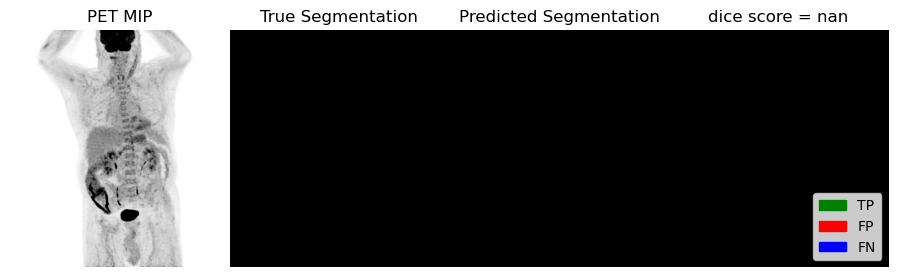

Dice Score: 0.0


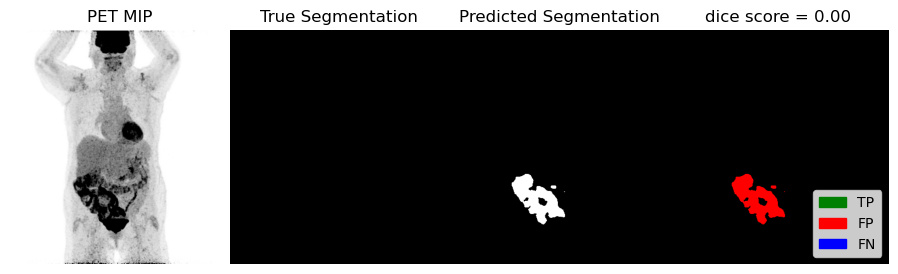

Dice Score: 0.0


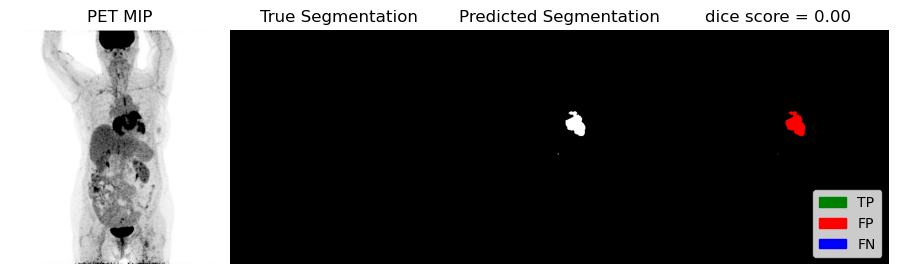

Dice Score: nan


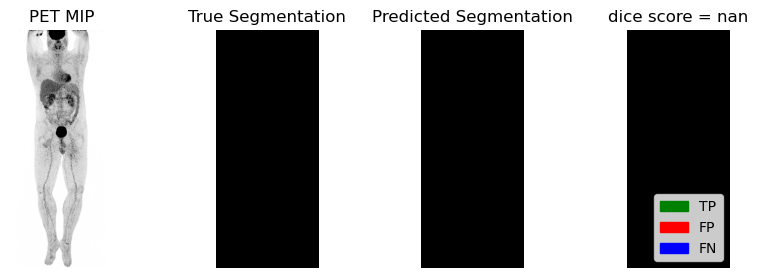

Dice Score: nan


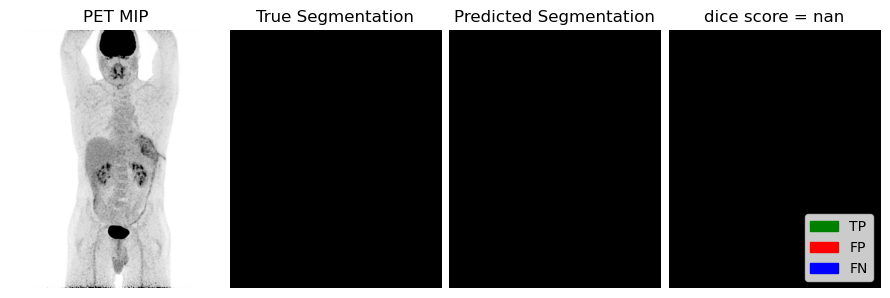

Dice Score: 0.0


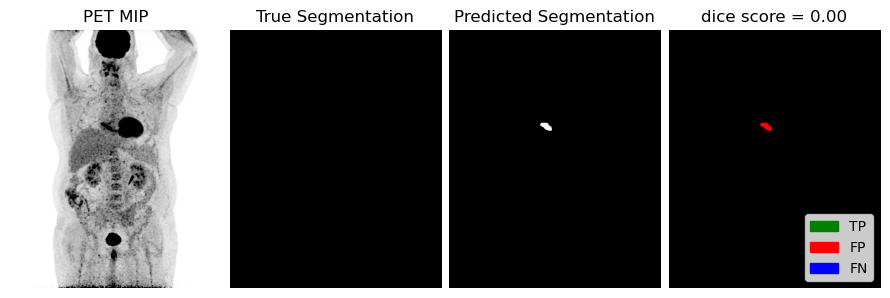

Dice Score: 0.0


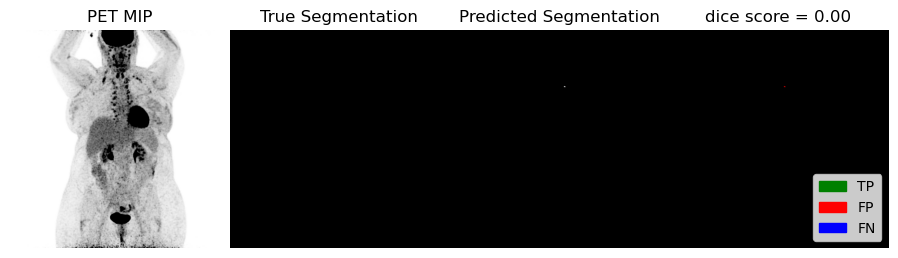

Dice Score: nan


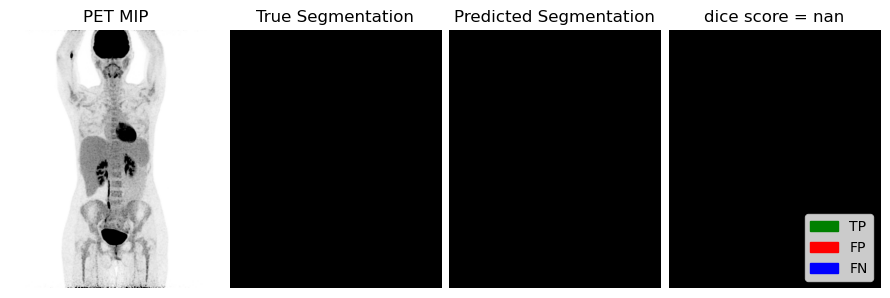

Dice Score: nan


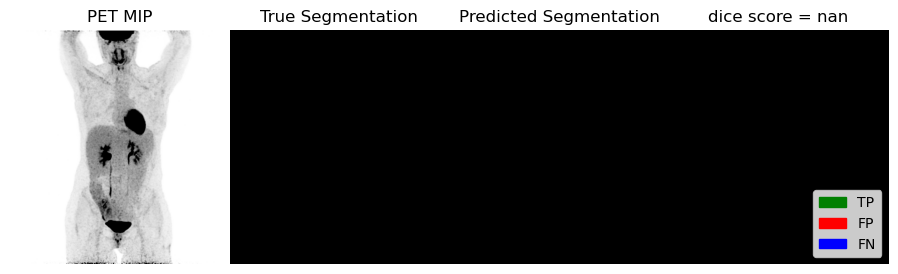

Dice Score: nan


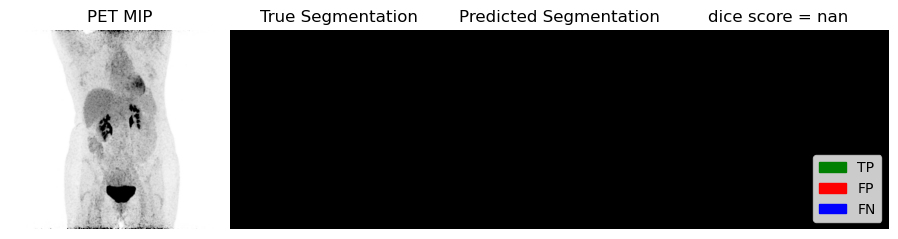

Dice Score: nan


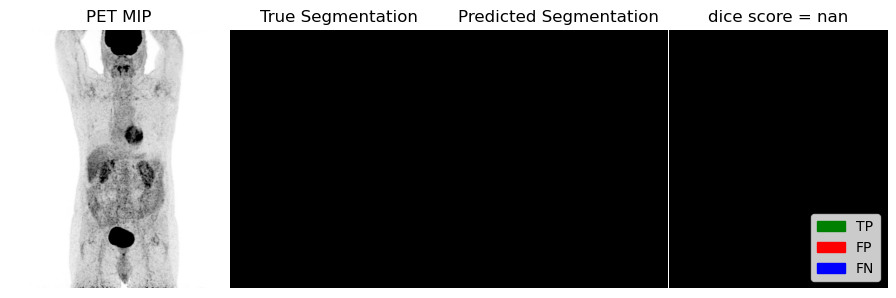

Dice Score: 0.0


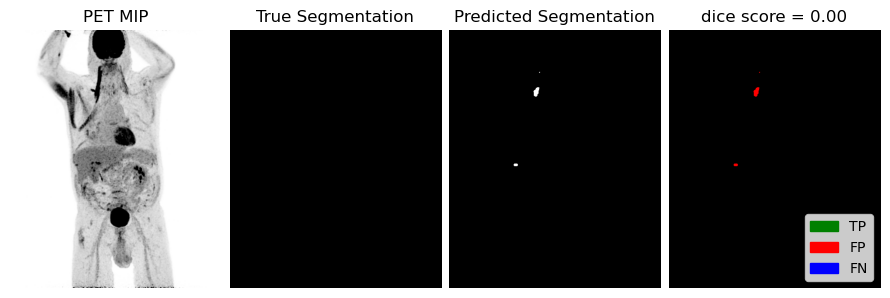

Dice Score: nan


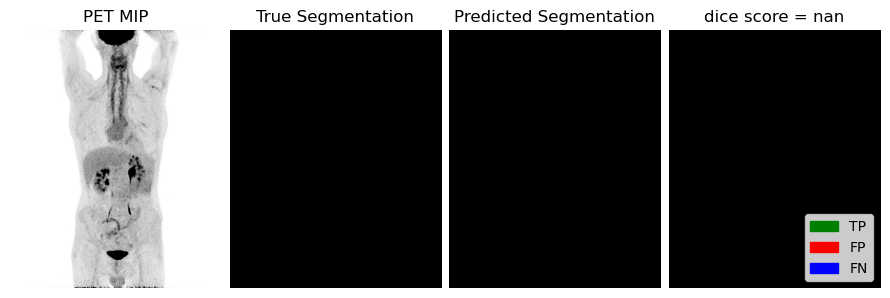

Dice Score: 0.0


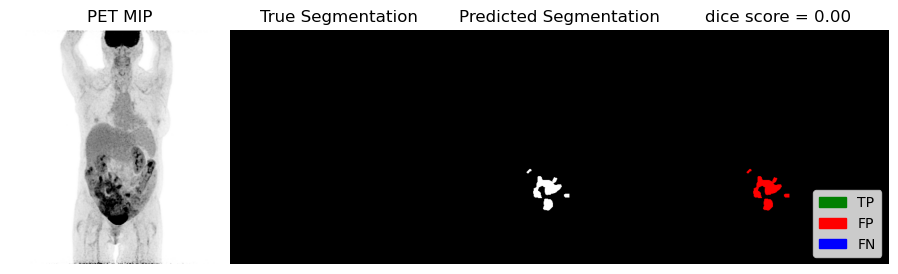

Dice Score: 0.0


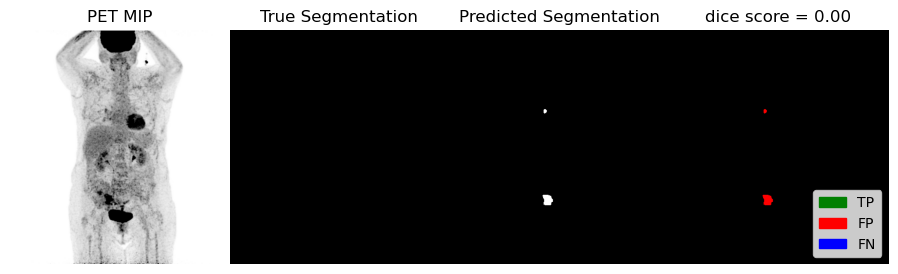

Dice Score: nan


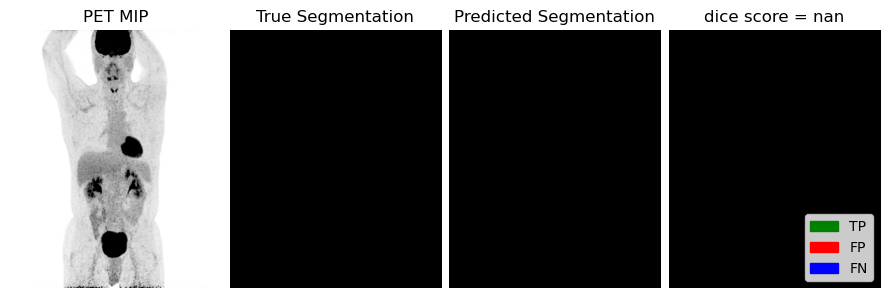

Dice Score: 0.0


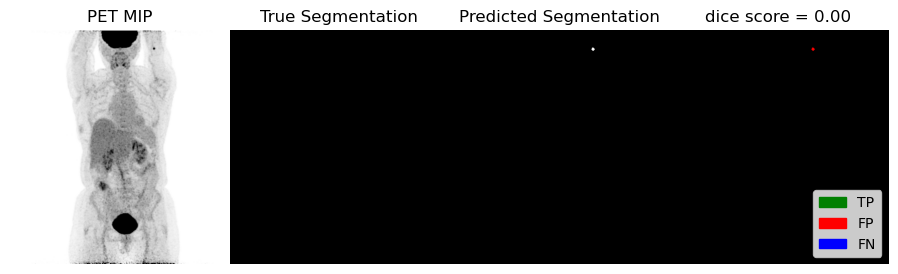

Dice Score: nan


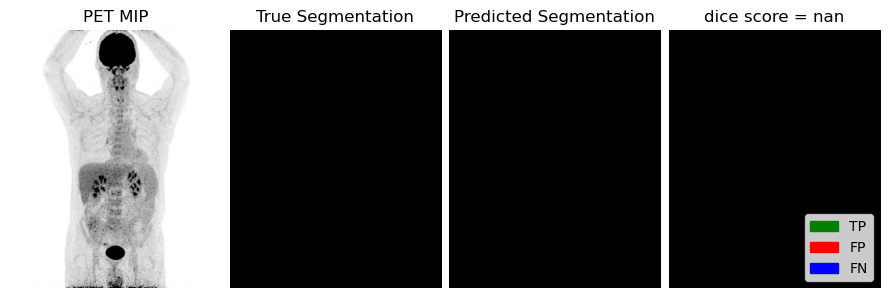

Dice Score: 0.0


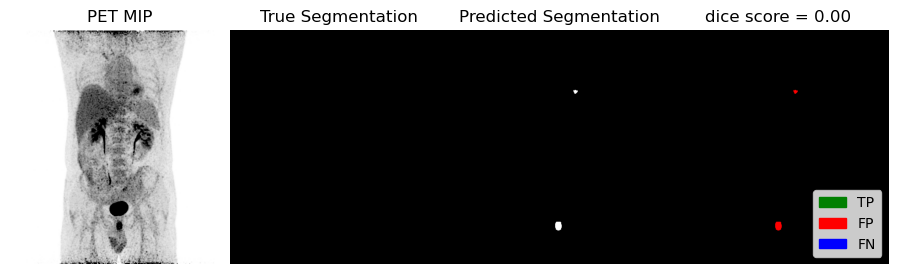

Dice Score: nan


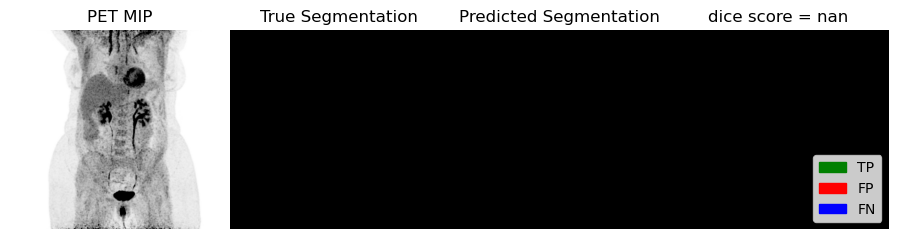

Dice Score: 0.0


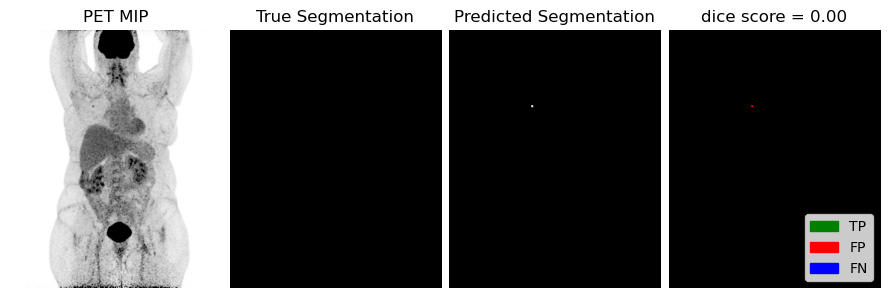

Dice Score: nan


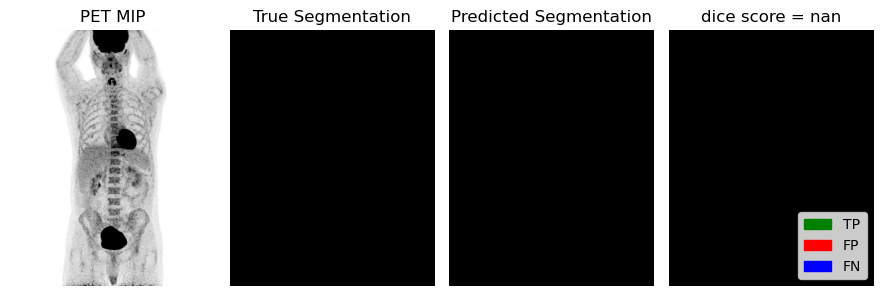

In [71]:
length = len(validation_paths)

def is_prediction_correct(seg_pred):
    return np.all(seg_pred == 0)

def correct_prediction_score():
    correct_predictions = 0

    for i in range(0, length):
        index_patient = '{:03d}'.format(i)
        seg_pred_path = f'data_validation/controls/labels/segmentation_{index_patient}.png'

        # Read the predicted segmentation
        seg_pred = cv2.imread(seg_pred_path, cv2.IMREAD_GRAYSCALE)

        # Check if the prediction is correct (entirely black)
        if is_prediction_correct(seg_pred):
            correct_predictions += 1

    # Calculate the score as the ratio of correct predictions
    return correct_predictions / length if length > 0 else 0

def save_incorrect_predictions():
    incorrect_predictions = 0
    index = 0
    for i in range(0, length):
        index_patient = '{:03d}'.format(i)
        img_f_path = f'data_validation/controls/imgs/control_{index_patient}.png'
        seg_pred_path = f'data_validation/controls/labels/segmentation_{index_patient}.png'

        # Read the images
        img_f = cv2.imread(img_f_path)
        seg_pred = cv2.imread(seg_pred_path, cv2.IMREAD_GRAYSCALE)

        # Check if the prediction is incorrect (not entirely black)
        if not is_prediction_correct(seg_pred):
            incorrect_predictions += 1

            index_save = '{:03d}'.format(index)
            index += 1

            # Save the image in a specific folder
            save_path = f'data/controls/imgs/incorrect_{index_save}.png'
            cv2.imwrite(save_path, img_f)

    return incorrect_predictions

# Example usage:
cps = correct_prediction_score()
print("Correct Prediction Score:", cps)

incorrect_count = save_incorrect_predictions()
print("Number of Incorrect Predictions:", incorrect_count)

for i in range(0, length, 20):
    index_patient = '{:03d}'.format(i)
    img_f_path = f'data_validation/controls/imgs/control_{index_patient}.png'
    seg_pred_path = f'data_validation/controls/labels/segmentation_{index_patient}.png'

    # Read the images
    img_f = cv2.imread(img_f_path)
    seg_pred = cv2.imread(seg_pred_path)

    # Validate the segmentation
    validate_segmentation(img_f, seg_pred)

    # generate black image with the same size as the original image
    seg_true = np.zeros((img_f.shape[0], img_f.shape[1], 3), dtype=np.uint8)

    # Plot the prediction (assuming plot_prediction function exists and works correctly)
    plot_prediction(img_f, seg_true, seg_pred)